We start this notebook by typing a "magic" command that allows iPython notebooks to display plots directly in the browser.

In [1]:
# Render our plots inline
%matplotlib inline

In order to read and process files, we are going to use a very powerful, and widely used Python library, called pandas. So, our next step is to import the pandas library in Python, and also import the library matplotlib for generating plots:

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

Pandas should already be installed on your machine, but if you get an error in the import statement above, indicating that pandas is not available, please go to the Unix shell and type:

`sudo pip install -U pandas`

It will take a few minutes to get everything installed.

And we type some code to simply change the visual style of the plots. (The code below is optional and not necessary, and for now you do not need to understand what exactly is happening.)

In [3]:
# Make the graphs a bit prettier, and bigger
pd.set_option('display.mpl_style', 'default')
plt.rcParams['figure.figsize'] = (15, 5)

Let's take a look at the restaurant inspections file (at /home/ubuntu/data/restaurants.csv), which we used in our earlier classes.

If you do not have it, then type the following in the shell:

`curl 'https://dl.dropboxusercontent.com/u/16006464/DwD_Winter2015/restaurant.zip' -o /home/ubuntu/data/restaurant.zip`

`unzip /home/ubuntu/data/restaurant.zip -d /home/ubuntu/data/`


In [4]:
!head -5 /home/ubuntu/data/restaurant.csv

CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,VIOLATION CODE,VIOLATION DESCRIPTION,CRITICAL FLAG,SCORE,GRADE,GRADE DATE,RECORD DATE,INSPECTION TYPE
30075445,MORRIS PARK BAKE SHOP,BRONX,1007,MORRIS PARK AVE,10462,7188924968,Bakery,02/09/2015,Violations were cited in the following area(s).,06C,"Food not protected from potential source of contamination during storage, preparation, transportation, display or service.",Critical,6,A,02/09/2015,09/21/2015,Cycle Inspection / Initial Inspection
30075445,MORRIS PARK BAKE SHOP,BRONX,1007,MORRIS PARK AVE,10462,7188924968,Bakery,03/03/2014,Violations were cited in the following area(s).,10F,"Non-food contact surface improperly constructed. Unacceptable material used. Non-food contact surface or equipment improperly maintained and/or not properly sealed, raised, spaced or movable to allow accessibility for cleaning on all sides, above and underneath the unit.",Not Critical,2,A,03/03/2014,09/21/2015,Cycle Ins

We want to be able to read and process this file within Python. The pandas library has a very convenient method `read_csv` which reads the file, and returns back a variable that contains its contents.

In [5]:
restaurants = pd.read_csv("/home/ubuntu/data/restaurant.csv", dtype=unicode, encoding="utf-8")

When you read a CSV, you get back a kind of object called a DataFrame, which is made up of rows and columns. You get columns out of a DataFrame the same way you get elements out of a dictionary. Let's take a look at how the object looks like:

In [6]:
restaurants.head(10)

,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,VIOLATION CODE,VIOLATION DESCRIPTION,CRITICAL FLAG,SCORE,GRADE,GRADE DATE,RECORD DATE,INSPECTION TYPE
0,30075445,MORRIS PARK BAKE SHOP,BRONX,1007,MORRIS PARK AVE,10462,7188924968,Bakery,02/09/2015,Violations were cited in the following area(s).,06C,Food not protected from potential source of co...,Critical,6,A,02/09/2015,09/21/2015,Cycle Inspection / Initial Inspection
1,30075445,MORRIS PARK BAKE SHOP,BRONX,1007,MORRIS PARK AVE,10462,7188924968,Bakery,03/03/2014,Violations were cited in the following area(s).,10F,Non-food contact surface improperly constructe...,Not Critical,2,A,03/03/2014,09/21/2015,Cycle Inspection / Initial Inspection
2,30075445,MORRIS PARK BAKE SHOP,BRONX,1007,MORRIS PARK AVE,10462,7188924968,Bakery,10/10/2013,No violations were recorded at the time of thi...,NaN,NaN,Not Applicable,NaN,NaN,NaN,09/21/2015,Trans Fat / Second Compliance Inspection
3,30075445,MORRIS PARK BAKE SHOP,BRONX,1007,MORRIS PARK AVE,10462,7188924968,Bakery,09/11/2013,Violations were cited in the following area(s).,04L,Evidence of mice or live mice present in facil...,Critical,6,A,09/11/2013,09/21/2015,Cycle Inspection / Re-inspection
4,30075445,MORRIS PARK BAKE SHOP,BRONX,1007,MORRIS PARK AVE,10462,7188924968,Bakery,09/11/2013,Violations were cited in the following area(s).,04N,Filth flies or food/refuse/sewage-associated (...,Critical,6,A,09/11/2013,09/21/2015,Cycle Inspection / Re-inspection
5,30075445,MORRIS PARK BAKE SHOP,BRONX,1007,MORRIS PARK AVE,10462,7188924968,Bakery,08/14/2013,Violations were cited in the following area(s).,04C,Food worker does not use proper utensil to eli...,Critical,32,NaN,NaN,09/21/2015,Cycle Inspection / Initial Inspection
6,30075445,MORRIS PARK BAKE SHOP,BRONX,1007,MORRIS PARK AVE,10462,7188924968,Bakery,08/14/2013,Violations were cited in the following area(s).,04L,Evidence of mice or live mice present in facil...,Critical,32,NaN,NaN,09/21/2015,Cycle Inspection / Initial Inspection
7,30075445,MORRIS PARK BAKE SHOP,BRONX,1007,MORRIS PARK AVE,10462,7188924968,Bakery,08/14/2013,Violations were cited in the following area(s).,06A,Personal cleanliness inadequate. Outer garment...,Critical,32,NaN,NaN,09/21/2015,Cycle Inspection / Initial Inspection
8,30075445,MORRIS PARK BAKE SHOP,BRONX,1007,MORRIS PARK AVE,10462,7188924968,Bakery,08/14/2013,Violations were cited in the following area(s).,06C,Food not protected from potential source of co...,Critical,32,NaN,NaN,09/21/2015,Cycle Inspection / Initial Inspection
9,30075445,MORRIS PARK BAKE SHOP,BRONX,1007,MORRIS PARK AVE,10462,7188924968,Bakery,08/14/2013,Violations were cited in the following area(s).,08A,Facility not vermin proof. Harborage or condit...,Not Critical,32,NaN,NaN,09/21/2015,Cycle Inspection / Initial Inspection


You will notice that each line now has a number, which in a DataFrame is called the "index number" of the row (and serves as the equivalent of a primary key). If we already have a value that can serve as a primary key for a row then we can specify the "index_col" parameter.

In [7]:
restaurants = pd.read_csv("/home/ubuntu/data/restaurant.csv", dtype=unicode, index_col=["CAMIS"], encoding="utf-8")
restaurants

,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,VIOLATION CODE,VIOLATION DESCRIPTION,CRITICAL FLAG,SCORE,GRADE,GRADE DATE,RECORD DATE,INSPECTION TYPE
CAMIS,,,,,,,,,,,,,,,,,
30075445,MORRIS PARK BAKE SHOP,BRONX,1007,MORRIS PARK AVE,10462,7188924968,Bakery,02/09/2015,Violations were cited in the following area(s).,06C,Food not protected from potential source of co...,Critical,6,A,02/09/2015,09/21/2015,Cycle Inspection / Initial Inspection
30075445,MORRIS PARK BAKE SHOP,BRONX,1007,MORRIS PARK AVE,10462,7188924968,Bakery,03/03/2014,Violations were cited in the following area(s).,10F,Non-food contact surface improperly constructe...,Not Critical,2,A,03/03/2014,09/21/2015,Cycle Inspection / Initial Inspection
30075445,MORRIS PARK BAKE SHOP,BRONX,1007,MORRIS PARK AVE,10462,7188924968,Bakery,10/10/2013,No violations were recorded at the time of thi...,NaN,NaN,Not Applicable,NaN,NaN,NaN,09/21/2015,Trans Fat / Second Compliance Inspection
30075445,MORRIS PARK BAKE SHOP,BRONX,1007,MORRIS PARK AVE,10462,7188924968,Bakery,09/11/2013,Violations were cited in the following area(s).,04L,Evidence of mice or live mice present in facil...,Critical,6,A,09/11/2013,09/21/2015,Cycle Inspection / Re-inspection
30075445,MORRIS PARK BAKE SHOP,BRONX,1007,MORRIS PARK AVE,10462,7188924968,Bakery,09/11/2013,Violations were cited in the following area(s).,04N,Filth flies or food/refuse/sewage-associated (...,Critical,6,A,09/11/2013,09/21/2015,Cycle Inspection / Re-inspection
30075445,MORRIS PARK BAKE SHOP,BRONX,1007,MORRIS PARK AVE,10462,7188924968,Bakery,08/14/2013,Violations were cited in the following area(s).,04C,Food worker does not use proper utensil to eli...,Critical,32,NaN,NaN,09/21/2015,Cycle Inspection / Initial Inspection
30075445,MORRIS PARK BAKE SHOP,BRONX,1007,MORRIS PARK AVE,10462,7188924968,Bakery,08/14/2013,Violations were cited in the following area(s).,04L,Evidence of mice or live mice present in facil...,Critical,32,NaN,NaN,09/21/2015,Cycle Inspection / Initial Inspection
30075445,MORRIS PARK BAKE SHOP,BRONX,1007,MORRIS PARK AVE,10462,7188924968,Bakery,08/14/2013,Violations were cited in the following area(s).,06A,Personal cleanliness inadequate. Outer garment...,Critical,32,NaN,NaN,09/21/2015,Cycle Inspection / Initial Inspection
30075445,MORRIS PARK BAKE SHOP,BRONX,1007,MORRIS PARK AVE,10462,7188924968,Bakery,08/14/2013,Violations were cited in the following area(s).,06C,Food not protected from potential source of co...,Critical,32,NaN,NaN,09/21/2015,Cycle Inspection / Initial Inspection


The read_csv method has many options, and you can read further in the [online documentation](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.io.parsers.read_csv.html).

### Descriptive statistics

We can use the method "describe()" to get a quick overview of the data in the dataframe.

In [8]:
restaurants.describe()

,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,VIOLATION CODE,VIOLATION DESCRIPTION,CRITICAL FLAG,SCORE,GRADE,GRADE DATE,RECORD DATE,INSPECTION TYPE
count,494065,494299,494176,494298,494298,494188,494299,494299,493505,485116,484925,494299,463159,224272,222982,494299,493505
unique,20538,6,9601,4650,227,24304,84,1322,5,96,99,3,121,6,1214,1,33
top,SUBWAY,MANHATTAN,0,BROADWAY,10003,7186566210,American,06/18/2015,Violations were cited in the following area(s).,10F,Non-food contact surface improperly constructe...,Critical,12,A,05/28/2015,09/21/2015,Cycle Inspection / Initial Inspection
freq,4633,199937,2745,14315,13958,348,115891,975,465880,65345,65345,272083,38378,157558,748,494299,274055


### Selecting a subset of the columns

In a dataframe, we can specify the column(s) that we want to keep, and get back another dataframe with just the subset of the columns that we want to keep.

In [10]:
restaurants["VIOLATION CODE"]

CAMIS
30075445    06C
30075445    10F
30075445    NaN
30075445    04L
30075445    04N
30075445    04C
30075445    04L
30075445    06A
30075445    06C
30075445    08A
30075445    10F
30075445    16B
30075445    02G
30075445    10F
30075445    NaN
30075445    02G
30075445    04L
30075445    06C
30075445    08A
30075445    10F
30075445    16B
30075445    NaN
30112340    04A
30112340    10B
30112340    06C
30112340    10F
30112340    04H
30112340    06A
30112340    10F
30112340    02G
           ... 
50042013    NaN
50042027    NaN
50042033    NaN
50042037    NaN
50042038    NaN
50042039    NaN
50042041    NaN
50042048    NaN
50042052    NaN
50042055    NaN
50042058    NaN
50042061    NaN
50042067    NaN
50042069    NaN
50042072    NaN
50042074    NaN
50042075    NaN
50042077    NaN
50042078    NaN
50042079    NaN
50042083    NaN
50042084    NaN
50042099    NaN
50042105    NaN
50042109    NaN
50042113    NaN
50042114    NaN
50042118    NaN
50042128    NaN
50042130    NaN
Name: VIOLATION CO

In [12]:
restaurants[["GRADE DATE","VIOLATION CODE", "DBA"]]

,GRADE DATE,VIOLATION CODE,DBA
CAMIS,,,
30075445,02/09/2015,06C,MORRIS PARK BAKE SHOP
30075445,03/03/2014,10F,MORRIS PARK BAKE SHOP
30075445,NaN,NaN,MORRIS PARK BAKE SHOP
30075445,09/11/2013,04L,MORRIS PARK BAKE SHOP
30075445,09/11/2013,04N,MORRIS PARK BAKE SHOP
30075445,NaN,04C,MORRIS PARK BAKE SHOP
30075445,NaN,04L,MORRIS PARK BAKE SHOP
30075445,NaN,06A,MORRIS PARK BAKE SHOP
30075445,NaN,06C,MORRIS PARK BAKE SHOP


We can also get quick statistics about the common values that appear in each column:

In [22]:
violation_counts = restaurants["VIOLATION CODE"].value_counts();
violation_counts[0:10]

10F    65345
08A    47150
02G    41998
04L    34622
06D    30133
10B    26994
06C    25494
02B    23391
04N    20414
04H    13410
Name: VIOLATION CODE, dtype: int64

In [19]:
violation_counts = restaurants["VIOLATION DESCRIPTION"].value_counts();
violation_counts[0:10]

Non-food contact surface improperly constructed. Unacceptable material used. Non-food contact surface or equipment improperly maintained and/or not properly sealed, raised, spaced or movable to allow accessibility for cleaning on all sides, above and underneath the unit.                      65345
Facility not vermin proof. Harborage or conditions conducive to attracting vermin to the premises and/or allowing vermin to exist.                                                                                                                                                                   47150
Cold food item held above 41º F (smoked fish and reduced oxygen packaged foods above 38 ºF) except during necessary preparation.                                                                                                                                                                     41998
Evidence of mice or live mice present in facility's food and/or non-food areas.                        

And we can use the "plot" command to plot the resulting histogram:

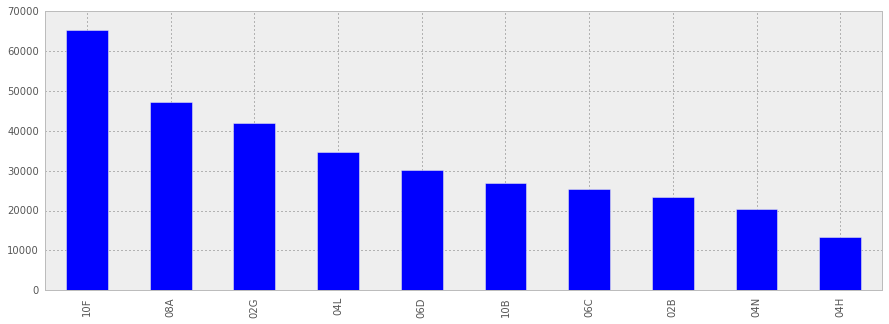

In [28]:
violation_counts[:10].plot(kind='bar')

#### Using the map command

The map command in Python has the following syntax:

`map(function, [list of values for first argument], [list of values for second argument]...)`

It takes as input a function, which has a set of parameters. Then, it iterates over the lists that follow; the lists contain the arguments that are passed to the function. Map returns a list of values that are the result of applying the function to all the elements of the list(s). 

For example, in the following code, the `add` function is going to be applied to the two lists (`[1, 2, 3, 4]` and `[9, 10, 10, 11]`) that follow. The result of the map will be a list containing the values `[add(1,2), add(2,10), add(3,10), add(4,11)]`




In [ ]:
def add(x,y):
    return x+y
    
example = map(add, [1, 2, 3, 4], [9, 10, 10, 11])
example

#### Using the map for dataframes

Using the map command, we can:
* Create new columns for the dataframe
* Modify existing columns
* Generate new lists that are the result of operations on the columns of the dataframe

For example, suppose that Pandas were not able to understand that `GRADE DATE` is a datetime. We can apply the `to_datetime` function to all the elements of that column, and replace the column with datetime objects:

In [ ]:
from pandas.tseries.tools import to_datetime

restaurants["GRADE DATE"] = map(to_datetime, restaurants["GRADE DATE"])

Or that we really do not like the names of boroughs in the "BORO" attribute, so we want to replace them with their hipster versions. We can define a function that takes as input the borough code, and returns the hipster name of the borough. Then, we use the map function to apply it to the column "BORO". We can then either replace the "BORO" column with the revised version, or (more safe) create a new column with the new version:

In [ ]:
def hipsterize(borocode):
    if borocode == "MANHATTAN":
        return "Manna-hata"
    elif borocode == "BRONX":
        return "Bronck's"
    elif borocode == "BROOKLYN":
        return "Breuckelen"
    elif borocode == "QUEENS":
        return "Queens" # Queens cannot be hipsterized, hipsters!
    elif borocode == "STATEN ISLAND":
        return "St-Generaal" 
    else:
        return "N/A"
    
restaurants['HipsterBorough'] = map(hipsterize, restaurants['BORO'])

In [ ]:
restaurants[["DBA", "BORO", "HipsterBorough"]]

### Selecting rows

To select rows, we can use the following approach, where we generate a list of boolean values, one for each row of the dataframe, and then we use the list to select which of the rows of the dataframe we want to keep"

In [30]:
is_08A = (restaurants["VIOLATION CODE"] == "08A")
inspections08A = restaurants[is_08A]
inspections08A["DBA"].value_counts()[:10]

MCDONALD'S                    420
SUBWAY                        392
CROWN FRIED CHICKEN           188
DUNKIN' DONUTS                187
KENNEDY FRIED CHICKEN         165
BURGER KING                   162
DUNKIN DONUTS                 161
STARBUCKS COFFEE              157
DOMINO'S PIZZA                154
POPEYES CHICKEN & BISCUITS    102
Name: DBA, dtype: int64

And we can use more complex conditions:

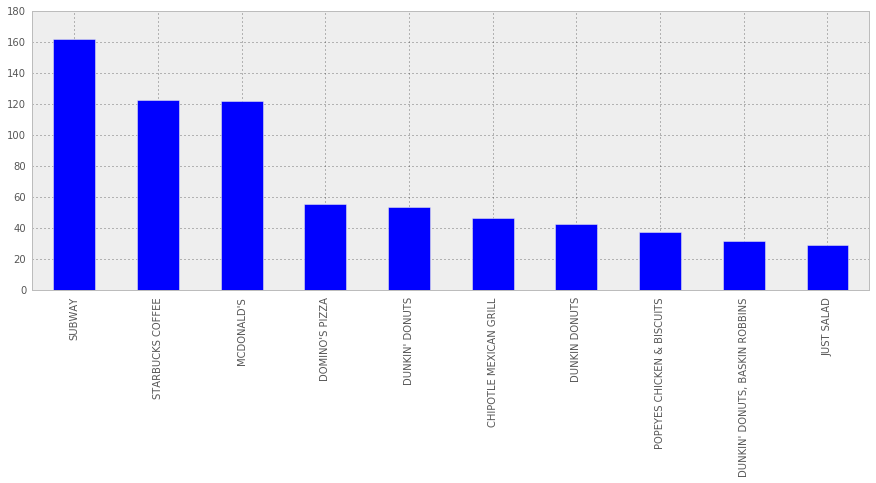

In [34]:
is_08A_manhattan = (restaurants["VIOLATION CODE"] == "08A") & (restaurants["BORO"] == "MANHATTAN")
inspections08A_in_manhattan = restaurants[is_08A_manhattan]
inspections08A_in_manhattan["DBA"].value_counts()[:10].plot(kind='bar')

In [47]:
is_08A = (restaurants["VIOLATION CODE"] == "08A")
violations08A = restaurants[is_08A]
violations08Acounts = violations08A['BORO'].value_counts()
violations08Acounts

MANHATTAN        17986
BROOKLYN         12135
QUEENS           11183
BRONX             4672
STATEN ISLAND     1168
Missing              6
Name: BORO, dtype: int64

In [48]:
boro_counts = restaurants['BORO'].value_counts()
boro_counts

MANHATTAN        199937
BROOKLYN         119033
QUEENS           114649
BRONX             44300
STATEN ISLAND     16285
Missing              95
Name: BORO, dtype: int64

In [49]:
violations08Acounts / boro_counts

MANHATTAN        0.089958
BROOKLYN         0.101947
QUEENS           0.097541
BRONX            0.105463
STATEN ISLAND    0.071722
Missing          0.063158
Name: BORO, dtype: float64

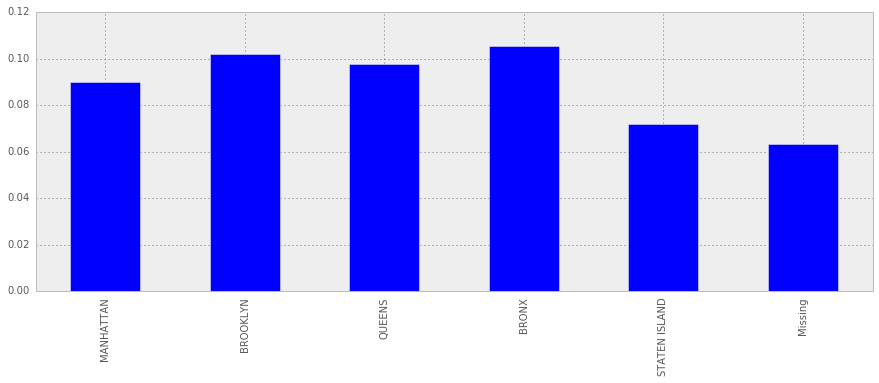

In [50]:
(violations08Acounts / boro_counts).plot(kind='bar')

## Reading Excel files

Pandas make it trivially easy to read the contents of Excel files. For example, I stored the restaurant inspection dataset as an excel file. Let's grab it and get it stored locally:

In [ ]:
!curl -L -s "https://dl.dropboxusercontent.com/u/16006464/DwD_Fall2014/Restaurants.xlsx" -o Restaurants.xlsx

To read the Excel file, pandas uses the xlrd package. It is already installed in your machine, but if not, then type this in the shell:

`sudo pip install xlrd`

In [51]:
restaurantsExcelFile = pd.ExcelFile("Restaurants.xlsx");

Read the worksheet named "WebExtract"

In [52]:
tableWebExtract = restaurantsExcelFile.parse(sheetname="WebExtract");

In [53]:
tableViolationCodes = restaurantsExcelFile.parse(sheetname='Violation');

In [54]:
tableWebExtract

,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINECODE,INSPDATE,ACTION,VIOLCODE,SCORE,CURRENTGRADE,GRADEDATE,RECORDDATE
0,30191841,DJ REYNOLDS PUB AND RESTAURANT,1,351,WEST 57 STREET,10019,2122452912,47,2014-09-06,D,10F,2,A,2014-09-06,2014-09-11 06:01:26.563
1,40356068,TOV KOSHER KITCHEN,4,97-22,63 ROAD,11374,7188967788,50,2013-01-17,D,02B,13,Z,2013-01-17,2014-09-11 06:01:26.563
2,40356483,WILKEN'S FINE FOOD,3,7114,AVENUE U,11234,7184443838,27,2014-05-29,D,04M,10,A,2014-05-29,2014-09-11 06:01:26.563
3,40356731,TASTE THE TROPICS ICE CREAM,3,1839,NOSTRAND AVENUE ...,11226,7188560821,43,2014-07-14,D,10F,12,A,2014-07-14,2014-09-11 06:01:26.563
4,30112340,WENDY'S,3,469,FLATBUSH AVENUE,11225,7182875005,39,2014-07-01,F,04J,23,B,2014-07-01,2014-09-11 06:01:26.563
5,30075445,MORRIS PARK BAKE SHOP,2,1007,MORRIS PARK AVE ...,10462,7188924968,8,2014-03-03,D,10F,2,A,2014-03-03,2014-09-11 06:01:26.563
6,30112340,WENDY'S,3,469,FLATBUSH AVENUE,11225,7182875005,39,2014-07-01,F,06A,23,B,2014-07-01,2014-09-11 06:01:26.563
7,40358429,MAY MAY KITCHEN,3,1269,SUTTER AVENUE,11208,7182354485,20,2013-08-28,D,02B,7,A,2013-08-28,2014-09-11 06:01:26.563
8,40360045,SEUDA FOODS,3,705,KINGS HIGHWAY ...,11223,7183751500,50,2013-10-10,D,04L,13,A,2013-10-10,2014-09-11 06:01:26.563
9,40356151,BRUNOS ON THE BOULEVARD,4,8825,ASTORIA BOULEVARD ...,11369,7183350505,3,2014-05-02,F,06D,10,A,2014-05-02,2014-09-11 06:01:26.563


In [55]:
tableViolationCodes

,STARTDATE,ENDDATE,CRITICALFLAG,VIOLATIONCODE,VIOLATIONDESC
0,1901-01-01,2003-03-23,Y,01A,Current valid <a onmouseover=ShowContent('P...
1,2003-03-24,2005-02-17,Y,01A,Current valid <a onmouseover=ShowContent('P2'
2,2005-02-18,2007-06-30,Y,01A,Current valid <a onmouseover=ShowContent('P2'
3,2007-07-01,2008-06-30,Y,01A,"Current valid permit, registration or other au..."
4,2008-07-01,2009-08-01,Y,01A,"Current valid permit, registration or other au..."
5,1901-01-01,2003-03-23,Y,01B,"Current valid permit, registration or other au..."
6,2003-03-24,2005-02-17,Y,01B,"Document issued by the Board, Commissioner or ..."
7,2005-02-18,2007-06-30,Y,01B,"Document issued by the Board, Commissioner or ..."
8,2007-07-01,2008-06-30,Y,01B,"Document issued by the Board, Commissioner or ..."
9,2008-07-01,2009-08-01,Y,01B,"Document issued by the Board, Commissioner or ..."


### Comparison with SQL

For a comparison with SQL, see http://pandas.pydata.org/pandas-docs/stable/comparison_with_sql.html

Pandas supports its own set of operators for doing SQL-like operations (in reality it runs a in-memory SQL database in the backend). It is also possible to use straightforward SQL queries to query Pandas dataframes, by using the `pandasql` package:

In [ ]:
!sudo -H pip install -U pandasql

In [ ]:
from pandasql import sqldf

In [ ]:
def pysqldf(q):
    return sqldf(q, globals())

In [ ]:
# PandaSQL does not like column names with spaces. So we will rename (some of) them.
restaurants.rename(columns={"VIOLATION CODE": "VIOLATION"}, inplace = True)

In [ ]:
rest = restaurants[["DBA", "BORO", "VIOLATION"]]

In [ ]:
q  = """
SELECT BORO, VIOLATION, COUNT(*) AS CNT 
FROM
  rest
GROUP BY BORO, VIOLATION
ORDER BY CNT DESC
LIMIT 20;
"""

df = pysqldf(q)

In [ ]:
df